# Wavenet Demo
Demo of our efficient generation implementation.

Trains wavenet on a single wav file. Then generates that file, starting from a single sample.

In [1]:
from time import time

from wavenet.utils import make_batch
from wavenet.models import Model, Generator

from IPython.display import Audio

%matplotlib inline

In [2]:
inputs, targets = make_batch('assets/voice.wav')
num_time_samples = inputs.shape[1]
num_channels = 1
gpu_fraction = 1.0

model = Model(num_time_samples=num_time_samples,
              num_channels=num_channels,
              gpu_fraction=gpu_fraction)

Audio(inputs.reshape(inputs.shape[1]), rate=44100)

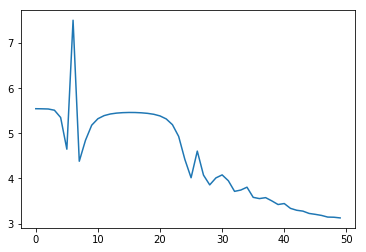

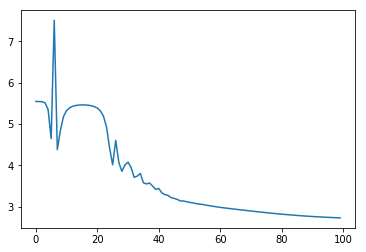

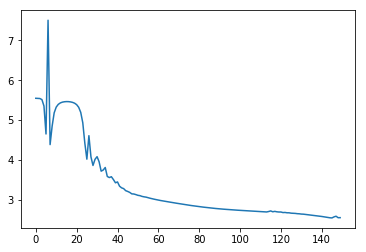

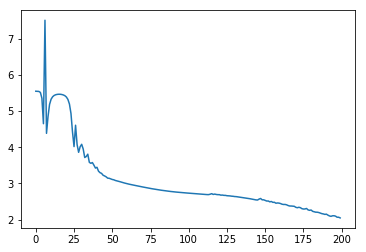

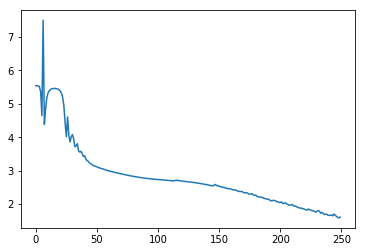

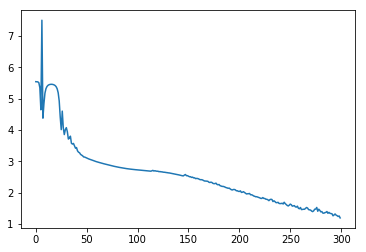

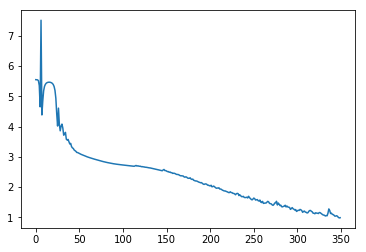

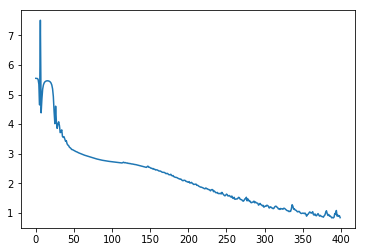

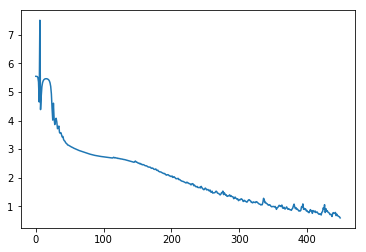

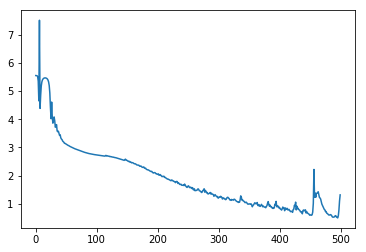

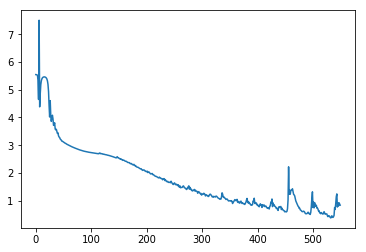

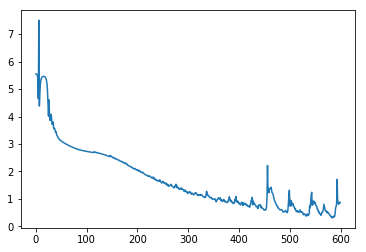

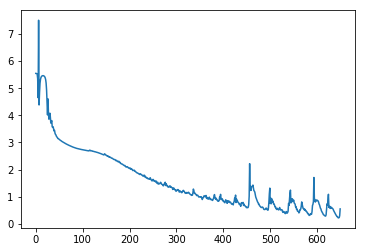

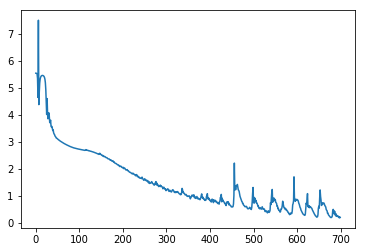

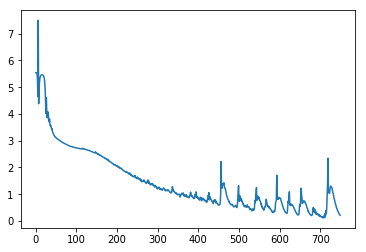

Training took 13714.46448302269 seconds.


In [3]:
tic = time()
model.train(inputs, targets)
toc = time()

print('Training took {} seconds.'.format(toc-tic))

Make Generator.


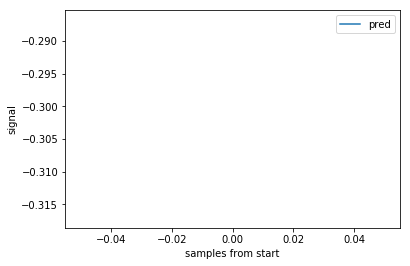

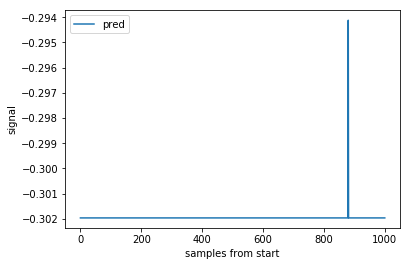

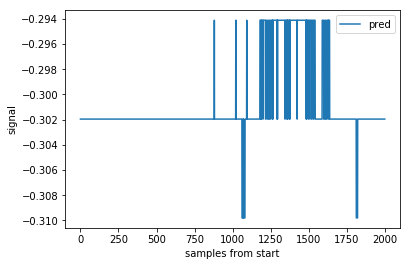

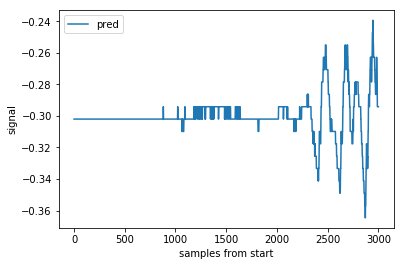

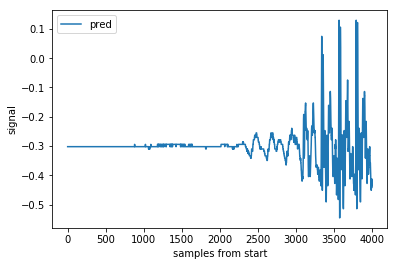

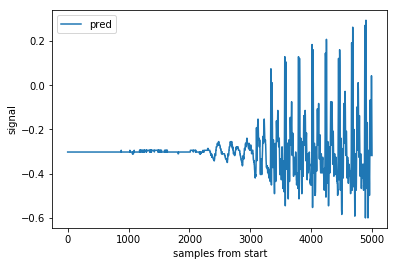

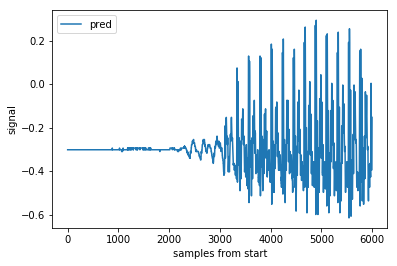

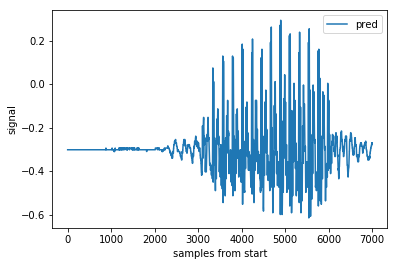

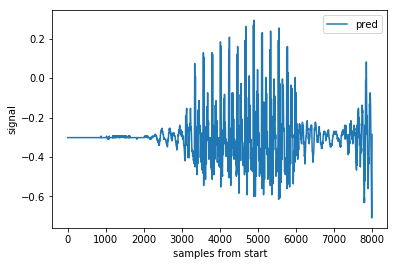

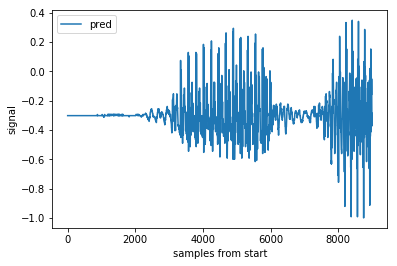

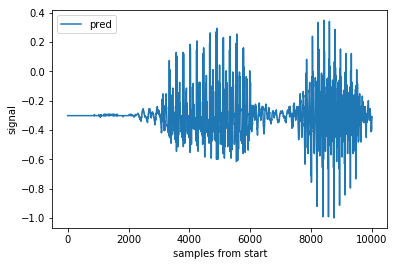

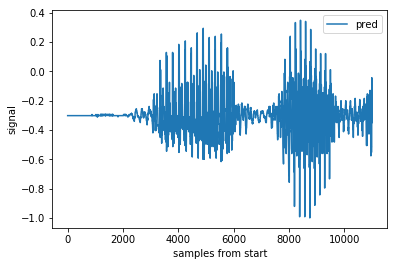

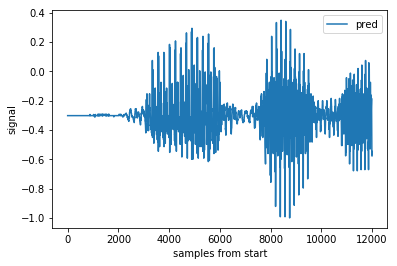

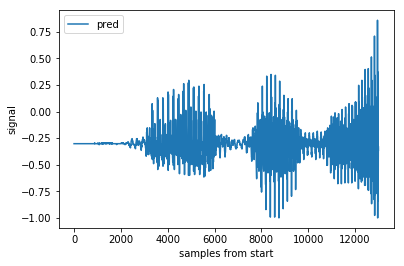

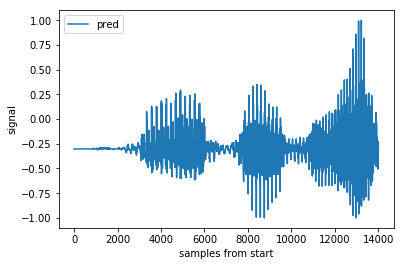

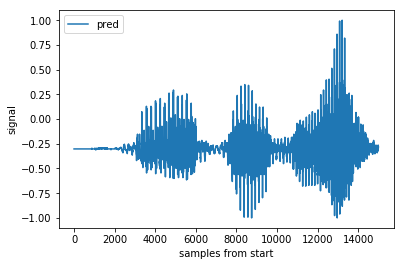

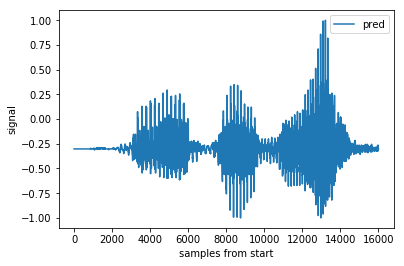

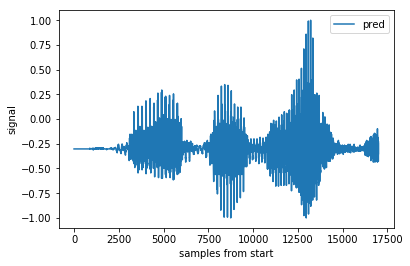

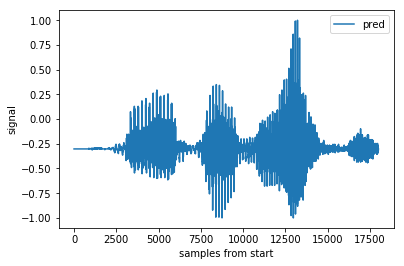

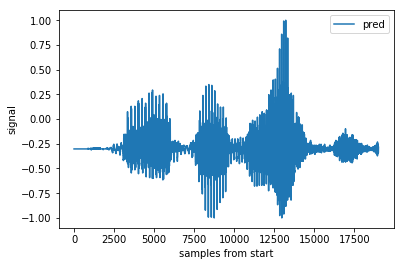

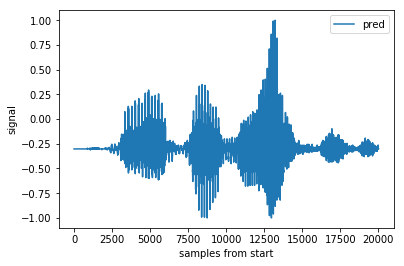

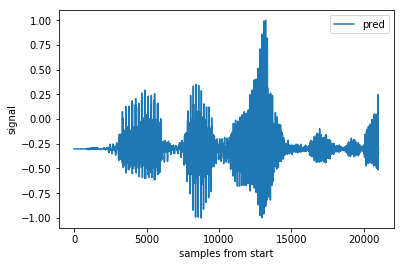

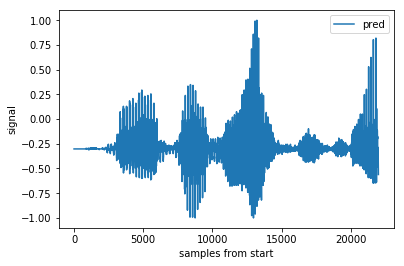

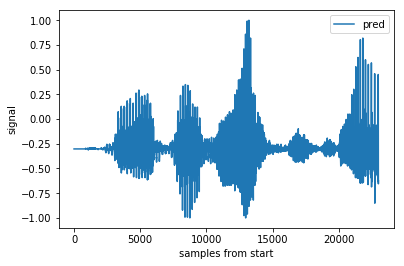

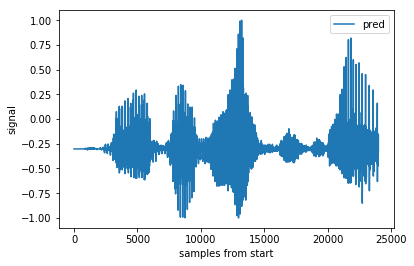

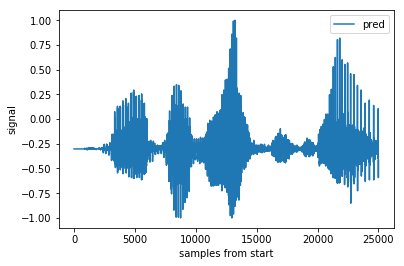

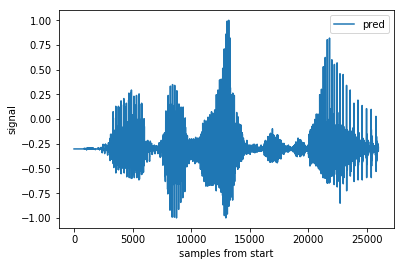

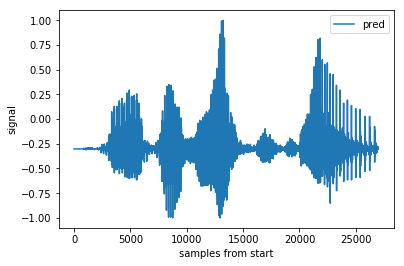

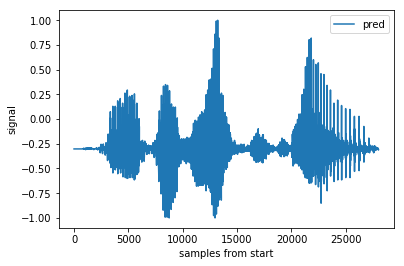

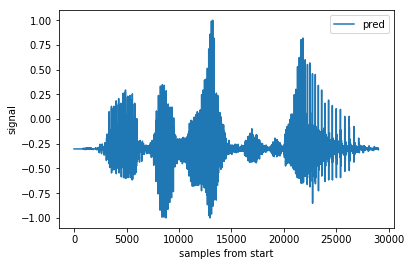

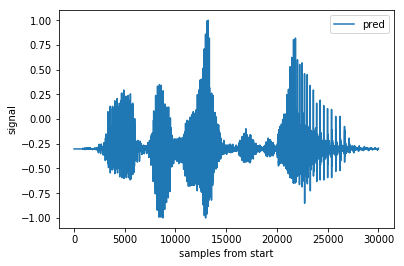

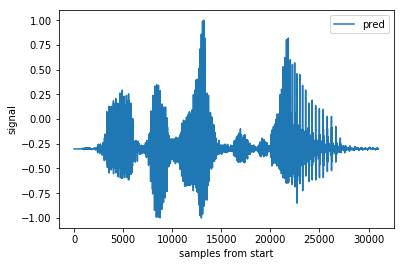

Generating took 97.20240998268127 seconds.


In [4]:
generator = Generator(model)

# Get first sample of input
input_ = inputs[:, 0:1, 0]

tic = time()
predictions = generator.run(input_, 32000)
toc = time()
print('Generating took {} seconds.'.format(toc-tic))

In [5]:
Audio(predictions, rate=44100)